In [3]:
from diffusers import UnCLIPImageVariationPipeline
import torch, numpy as np
from PIL import Image
import torchvision
from glob import glob
from sklearn.decomposition import PCA
from diffusers import StableUnCLIPImg2ImgPipeline
from diffusers.utils import load_image

In [4]:
pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
)
pipe = pipe.to("cuda")

Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

In [5]:
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/stable_unclip/tarsila_do_amaral.png"
init_image = load_image(url)

In [6]:
images = pipe(init_image).images

  0%|          | 0/21 [00:00<?, ?it/s]

In [13]:
pipe.feature_extractor

CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [14]:
pipe.image_encoder

CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1280)
    )
    (pre_layrnorm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-31): 32 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (layer_norm1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1280, out_features=51

In [2]:
pipe = UnCLIPImageVariationPipeline.from_pretrained("kakaobrain/karlo-v1-alpha-image-variations", torch_dtype=torch.float16)
pipe = pipe.to('cuda')

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

/mnt/ceph_rbd/zbc/miniconda3/envs/llavapp/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
An error occurred while trying to fetch /mnt/ceph_rbd/zbc/.cache/huggingface/hub/models--kakaobrain--karlo-v1-alpha-image-variations/snapshots/4573828a41f333df688b1111b04add3d9f548331/text_proj: Error no file named diffusion_pytorch_model.safetensors found in directory /mnt/ceph_rbd/zbc/.cache/huggingface/hub/models--kakaobrain--karlo-v1-alpha-image-variations/snapshots/4573828a41f333df688b1111b04add3d9f548331/text_proj.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /mnt/ceph_rbd/zbc/.cach

In [3]:
img = Image.open('me.jpg')

In [4]:
image = pipe(img).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
def extract_clip_latent(img):
    img_tensor = torch.from_numpy(np.array(img))
    f = pipe.feature_extractor(img_tensor.unsqueeze(0))
    clip_latent = pipe.image_encoder(torch.from_numpy(f['pixel_values'][0]).unsqueeze(0).cuda())
    return clip_latent.image_embeds

def batch_extract_clip_latent(imgs):
    img_tensors = torch.stack([torch.from_numpy(np.array(img)) for img in imgs])
    f = pipe.feature_extractor(img_tensors)
    clip_latents = pipe.image_encoder(torch.stack([torch.from_numpy(item) for item in f['pixel_values']]).cuda())
    return clip_latents.image_embeds

In [3]:
from paintmind.utils.datasets import ImageNet

In [4]:
dataset = ImageNet(root='/mnt/ceph_rbd/zbc/data/imagenet/', split='train', img_size=224, scale=0.8)

In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False, num_workers=4)

In [6]:
len(dataloader)

40037

In [7]:
from transformers import CLIPProcessor, CLIPModel

In [8]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

/mnt/ceph_rbd/zbc/miniconda3/envs/llavapp/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

/mnt/ceph_rbd/zbc/miniconda3/envs/llavapp/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [11]:
model.cuda()

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [13]:
model.vision_model

CLIPVisionTransformer(
  (embeddings): CLIPVisionEmbeddings(
    (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (position_embedding): Embedding(197, 768)
  )
  (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (encoder): CLIPEncoder(
    (layers): ModuleList(
      (0-11): 12 x CLIPEncoderLayer(
        (self_attn): CLIPAttention(
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): CLIPMLP(
          (activation_fn): QuickGELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
       

In [18]:
model.get_image_features(img.cuda()).shape

torch.Size([32, 512])

In [19]:
embeds = []
for i, (img, _) in enumerate(dataloader):
    with torch.no_grad():
        embeds.append(model.get_image_features(img.cuda()).cpu())
    if i % 1000 == 0:
        print(f'{i}/{len(dataloader)}')

0/40037
1000/40037
2000/40037
3000/40037
4000/40037
5000/40037
6000/40037
7000/40037
8000/40037
9000/40037
10000/40037
11000/40037
12000/40037
13000/40037
14000/40037
15000/40037
16000/40037
17000/40037
18000/40037
19000/40037
20000/40037
21000/40037
22000/40037
23000/40037
24000/40037
25000/40037
26000/40037
27000/40037
28000/40037
29000/40037
30000/40037
31000/40037
32000/40037
33000/40037
34000/40037
35000/40037
36000/40037
37000/40037
38000/40037
39000/40037
40000/40037


In [20]:
embeds = torch.cat(embeds)

In [21]:
embeds.shape

torch.Size([1281167, 512])

In [22]:
torch.save(embeds, 'imagenet_openai_clip_embeds.pt')

In [23]:
embeds = torch.load('imagenet_openai_clip_embeds.pt')

In [24]:
embeds_mean = embeds.mean(0)
embeds_centered = embeds - embeds_mean

In [25]:
pca = PCA(n_components=512, random_state=42)
pca.fit(embeds_centered)

PCA(n_components=512, random_state=42)

In [26]:
explained_ratio = pca.explained_variance_ratio_.cumsum()

In [27]:
explained_ratio

array([0.0749195 , 0.13283125, 0.17423531, 0.21180514, 0.23713748,
       0.26065785, 0.28192132, 0.30027865, 0.31563557, 0.33009398,
       0.34409978, 0.35724855, 0.37008345, 0.38222975, 0.39335678,
       0.40385373, 0.41423497, 0.42361406, 0.43269204, 0.44124007,
       0.44934215, 0.45693532, 0.46428413, 0.47155696, 0.4783448 ,
       0.48496733, 0.49146857, 0.4977054 , 0.50373236, 0.50966233,
       0.51546312, 0.52105791, 0.52650932, 0.53185442, 0.53695842,
       0.54204602, 0.54702322, 0.55180534, 0.55651276, 0.56109792,
       0.5656574 , 0.56999196, 0.57426383, 0.57842318, 0.58253444,
       0.58655261, 0.5904981 , 0.59442053, 0.59830435, 0.60208809,
       0.60580109, 0.60945316, 0.61305737, 0.61660241, 0.62010285,
       0.62353941, 0.62693008, 0.63031638, 0.63359044, 0.63680804,
       0.6400046 , 0.64315923, 0.64623577, 0.64929436, 0.65233301,
       0.65524808, 0.65813779, 0.66101417, 0.66387649, 0.66667428,
       0.66943834, 0.67218186, 0.67489292, 0.67758132, 0.68022

In [28]:
torch.save(pca, 'imagenet_openai_clip_pca.pt')

In [49]:
explained_ratio[-1] / 64

0.015255924587645322

In [9]:
@torch.no_grad()
def project_first_n_components(img, n=64):
    clip_latent = extract_clip_latent(img)
    clip_latent_centered = clip_latent - embeds_mean.cuda()
    clip_latent_projected = pca.transform(clip_latent_centered.cpu().numpy())
    clip_latent_projected[:,n:] = 0
    # return clip_latent_projected
    clip_latent_projected = torch.from_numpy(pca.inverse_transform(clip_latent_projected) + embeds_mean.cpu().numpy()).cuda()
    return pipe(image_embeddings=clip_latent_projected.half()).images[0]

@torch.no_grad()
def project_first_n_components_embeds(embeds, n=64):
    clip_latent_centered = embeds - embeds_mean
    clip_latent_projected = pca.transform(clip_latent_centered.cpu().numpy())
    clip_latent_projected[:,n:] = 0
    # return clip_latent_projected
    clip_latent_projected = torch.from_numpy(pca.inverse_transform(clip_latent_projected) + embeds_mean.cpu().numpy())
    return clip_latent_projected

@torch.no_grad()
def project_embeds(embeds, ):
    clip_latent_centered = embeds - embeds_mean
    clip_latent_projected = pca.transform(clip_latent_centered.cpu().numpy())
    return clip_latent_projected

In [16]:
embeds_projected = project_embeds(embeds)

In [17]:
from tqdm.notebook import trange
import gc

In [19]:
embeds_projected_dict = {}
for i in trange(8, 520, 8):
    new_embeds_projected = embeds_projected.copy()
    new_embeds_projected[:, i:] = 0
    new_embeds_back = torch.from_numpy(pca.inverse_transform(new_embeds_projected) + embeds_mean.cpu().numpy())
    embeds_projected_dict[i] = new_embeds_back
    if i % 64 == 0:
        torch.save(embeds_projected_dict, f'imagenet_clip_embeds_projected_{i}.pt')
        embeds_projected_dict = {}
        gc.collect()
        torch.cuda.empty_cache()

  0%|          | 0/64 [00:00<?, ?it/s]

In [85]:
me = Image.open('me.jpg').resize((512, 512))

In [99]:
projected_img = project_first_n_components(me, 512)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [106]:
from tqdm.notebook import trange

In [107]:
embeds_projected = {}
for i in trange(8, 512, 8):
    embeds_projected[i] = project_first_n_components_embeds(embeds, i)

  0%|          | 0/63 [00:00<?, ?it/s]

: 

In [ ]:
len(embeds_projected.keys())

In [43]:
latent = extract_clip_latent(me)

In [105]:
back_latent = torch.from_numpy(pca.inverse_transform(pca.transform(latent.cpu().detach().numpy()))).cuda()

In [106]:
out = pipe(image_embeddings=back_latent.half()).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

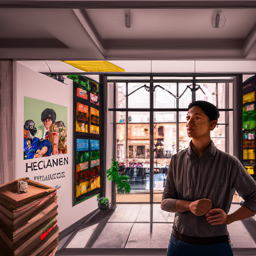

In [107]:
out